In [1]:
#CreditOne Regression Task C5T3

# this is scikit-learn task 
# We are going to build --> three Regression models using Python and Sci-Kit Learn

In [ ]:
#C5T3- #1 Step
#Selecting and Dividing the Data

In [66]:
#Import the modules 

#imports
#numpy,pandas,scipy, math, matplotlib
import numpy as np
import pandas as pd
import scipy
#import math 
from math import sqrt
import matplotlib.pyplot as plt

#estimators
from sklearn.ensemble  import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model

#model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from math import sqrt

#cross validation
#from sklearn.cross_validation import train_test_split  #Note: Use sklearn.modelselection instead of sklearn.crossvalidation reason is in new version of sklearn crossvalidation is changed to modelselection
from sklearn.model_selection import train_test_split



In [67]:
#Load data
rawData = pd.read_csv('C:/Users/bhavm/OneDrive/UOTA_DataAnalyst_ALL/Course5/C5Folder/C5T2/Data/New2_default of credit card clients.csv', header = 0)
rawData.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [68]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
LIMIT_BAL    30000 non-null int64
SEX          30000 non-null int64
EDUCATION    30000 non-null int64
MARRIAGE     30000 non-null int64
AGE          30000 non-null int64
PAY_0        30000 non-null int64
PAY_2        30000 non-null int64
PAY_3        30000 non-null int64
PAY_4        30000 non-null int64
PAY_5        30000 non-null int64
PAY_6        30000 non-null int64
BILL_AMT1    30000 non-null int64
BILL_AMT2    30000 non-null int64
BILL_AMT3    30000 non-null int64
BILL_AMT4    30000 non-null int64
BILL_AMT5    30000 non-null int64
BILL_AMT6    30000 non-null int64
PAY_AMT1     30000 non-null int64
PAY_AMT2     30000 non-null int64
PAY_AMT3     30000 non-null int64
PAY_AMT4     30000 non-null int64
PAY_AMT5     30000 non-null int64
PAY_AMT6     30000 non-null int64
def_pay      30000 non-null int64
dtypes: int64(24)
memory usage: 5.5 MB


In [69]:
#select any given column we would use the location number
#variableName = dataframe.iloc[rows,columns]
#Z = rawData.iloc[1:2, 'LIMIT_BAL']

Z = rawData.iloc[1:3, 0:2]
Z

,LIMIT_BAL,SEX
1,120000,2
2,90000,2


In [70]:
#select any given raw & column we would use the location number

#variableName = dataframe.iloc[rows,columns]
W = rawData.iloc[1:3,0:3]
W

,LIMIT_BAL,SEX,EDUCATION
1,120000,2,2
2,90000,2,2


In [71]:
# use Pandas to select any given column by its name
#variableName = dataframe['coumnName']
T = rawData['LIMIT_BAL']
#T

In [72]:
#select a range of columns (e.g., to establish the feature space) we can include a sub-selection within the column portion of the array as follows:
#variableName = dataframe.iloc[:,0:4]
S = rawData.iloc[:,0:4]
#S

In [73]:
rawData.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'def_pay'],
      dtype='object')

In [74]:
#1. Select the features
#features
features = rawData.iloc[:,12:23]
print('Summary of feature sample')
features.head()

Summary of feature sample


,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,3102,689,0,0,0,0,689,0,0,0,0
1,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [75]:
#features column names only
features.columns

Index(['BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

In [76]:
features.shape

(30000, 11)

In [77]:
#2. Select the Dependent Variable

#dependent variable
depVar = rawData['PAY_AMT6']


In [ ]:
#Training Data is divided into two parts: X-train and y_train
#Testing data follows the same rules and contains two sets: X_test and y_test (ground truth)
# Use 1000 sample
#70/30 split 

In [78]:
#sample data
# 3. Establish the training set for the X-variables or Feature space (first 1000 rows only)
#Training Set (Feature Space: X Training)
X_train = (features[: 1000])
X_train.head()

,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,3102,689,0,0,0,0,689,0,0,0,0
1,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [79]:
#4. Establish the training set for the Y-variable or dependent variable (the number of rows much match the X-training set)

#Dependent Variable Training Set (y Training)
y_train = depVar[: 1000]
y_train_count = len(y_train.index)
print('The number of observations in the Y training set are:',str(y_train_count))
y_train.head()

The number of observations in the Y training set are: 1000


0       0
1    2000
2    5000
3    1000
4     679
Name: PAY_AMT6, dtype: int64

In [80]:
#5. Establish the testing set for the X-Variables or Feature space

#Testing Set (X Testing)
X_test = features[-100:]
#X_test
X_test_count = len(X_test.index)
#X_test_count
print('The number of observations in the feature testing set is:',str(X_test_count))
print(X_test.head())

The number of observations in the feature testing set is: 100
       BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  \
29900          0          0          0          0          0         0   
29901      48750     103486      50590      50248      49387         0   
29902     168088     168955     161351     126198     124746    168096   
29903      17082      13333         99         99     172104     10018   
29904      56021      54126      58732      59306      59728      2600   

       PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  
29900         0         0         0         0         0  
29901      6556      3250      1563      1208       781  
29902      6409      7335      4448      4519      5003  
29903     13333        99        99    172104     30013  
29904      4553      5800      2000      1000      1462  


In [81]:
#6. Establish Ground truth 
#Ground Truth (y_test) 
y_test = depVar[-100:]
#y_test
y_test_count = len(y_test.index)
#y_test_count
print('The number of observations in the Y training set are:',str(y_test_count))
y_test.head()

The number of observations in the Y training set are: 100


29900        0
29901      781
29902     5003
29903    30013
29904     1462
Name: PAY_AMT6, dtype: int64

In [82]:
#Cross Validation
#from sklearn.cross_validation import train_test_split  # Doesn't work
from sklearn.model_selection import train_test_split

In [83]:
#X and Y training sets:

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train)

In [84]:
# Use the shape function to double check that the split was made as needed:

X_train.shape, X_test.shape

((750, 11), (250, 11))

In [27]:
# Sci-Kit Learn Format

In [60]:
#from sklearn

In [ ]:
#Sci-Kit Learn Estimator Object, which is (linear_model Estimator Object)here, was used to access the LinearRegression algorithm from the sklearn base as below :

In [85]:
 from sklearn.linear_model import LinearRegression 

In [86]:
#Tuning Parameters and Model Definition

# model = LinearRegression(parameters go here)
model = LinearRegression(n_jobs=10)  # this is parameter(n_jobs=10) for LinearRegression Algorithum/model


In [62]:
#next is 'how' to choose the best model for our data from three different algorithms and apply the most optimal one to make predictions

In [ ]:
#C5T3- #2 Step
# Building the Models and choosing the Right Model

In [ ]:
#1. import the modules # See above cell in [9]

In [87]:
#2. Establish variables that you will use for defining each model
#Models
modelSVR = SVR(gamma = 'auto')
modelRF = RandomForestRegressor(n_estimators = 100, random_state = 123)
modelLR = LinearRegression()

In [88]:
#3. Select the features (Note: we did above )
#features

features = rawData.iloc[:,12:23]
print('Summary of feature sample')
features.head()

Summary of feature sample


,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,3102,689,0,0,0,0,689,0,0,0,0
1,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [89]:
#4. Select the Dependent Variable
#dependent variable
print(depVar)

0            0
1         2000
2         5000
3         1000
4          679
5          800
6        13770
7         1542
8         1000
9            0
10          66
11        3640
12           0
13           0
14        3000
15        1100
16           0
17       50000
18           0
19           0
20       33764
21           0
22        1820
23        1128
24        2000
25         997
26        1000
27        1012
28           0
29           0
         ...  
29970    16080
29971     3000
29972     4800
29973        0
29974     1000
29975     7022
29976        0
29977     5000
29978    10059
29979        0
29980     2000
29981      585
29982        0
29983     1701
29984     1000
29985        0
29986        0
29987     4005
29988     6009
29989        0
29990     2000
29991        0
29992        0
29993     2000
29994     4000
29995     1000
29996        0
29997     3100
29998     1804
29999     1000
Name: PAY_AMT6, Length: 30000, dtype: int64


In [90]:
#5. Use the model variables you established in step 2  pass the training data to them in the following format (You used the train function from caret for this when you worked in R):

model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=10, normalize=False)

In [91]:
#6. Random Forest

modelRF.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=123, verbose=0,
                      warm_start=False)

In [ ]:
# How to handle above warnning message:
# https://machinelearningmastery.com/how-to-fix-futurewarning-messages-in-scikit-learn/

#This can be achieved by explicitly configuring the Python warning system to ignore warning messages of a specific type, such as ignore all FutureWarnings, or more generally, to ignore all warnings.

#This can be achieved by adding the following block around your code that you know will generate warnings:

# code 1 or code 2

#code 1
## run block of code and catch warnings
#with warnings.catch_warnings():
	## ignore all caught warnings
#	warnings.filterwarnings("ignore")
	## execute code that will generate warnings
	...
    
#code 2
## import warnings filter

#from warnings import simplefilter

## ignore all future warnings

#simplefilter(action='ignore', category=FutureWarning)

#EXAMPLE : 6. Random Forest

#modelRF.fit(X_train,y_train)

In [92]:
#7. Support Vector Regression

modelSVR.fit(X_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [93]:
#8. Linear Regression

cv = 5
modelLR.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Choosing the Right Model : by Model Fitting and Scoring

# score()  #this function is use to score model 
# cross_val_score # this metric we will use to check for proper model usage

In [94]:
#1. Random Forest Regression Model Fitting and Scoring

#Model Fitting
modelRF.fit(X_train,y_train)
print(cross_val_score(modelRF, X_train, y_train, cv = cv))
modelRF.score(X_train,y_train)

[0.99418627 0.99709229 0.62852184 0.97565186 0.81402263]


0.9694459575143491

In [95]:
#2.Support Vector Regression Model Fitting and Scoring

cv = 5
modelSVR.fit(X_train,y_train)
print(cross_val_score(modelSVR, X_train, y_train, cv = cv)) 
modelSVR.score(X_train,y_train)

[-0.06289959 -0.07971208 -0.02372344 -0.03879264 -0.02503685]


-0.02343730745959105

In [96]:
#3. Linear Regression Model Fitting and Scoring

cv = 5
modelLR.fit(X_train,y_train)
print(cross_val_score(modelLR, X_train, y_train, cv = cv)) 
modelLR.score(X_train,y_train)

[1. 1. 1. 1. 1.]


1.0

In [97]:
#EXTRA. LinearRegression model when (n_jobs=10 ) Fitting and Scoring

cv = 5
model.fit(X_train,y_train)
print(cross_val_score(model, X_train, y_train, cv =cv)) 
model.score(X_train,y_train)

[1. 1. 1. 1. 1.]


1.0

In [98]:
#C5T3- #3 Step  Making Predictions and Evaluating the Results
#Making Predictions

#Prediction
# RandomForest Model - Prediction
predictions = modelRF.predict(X_test)



In [ ]:
#Evaluating the Results

#1. sklearn.metrics Object
#Add below code on Top cell
#from sklearn.metrics import mean_squared_error
#from sklearn.metrics import r2_score

In [ ]:
#Since this is a Regression problem you will use RMSE and R squared to measure the trained model. 
#So why didn't you import a metric called RMSE? RMSE is just the Square Root of MSE (mean squared error) so you will also need 
#to ensure that we've also included the sqrt function from the math library during import:

#from math import sqrt

In [99]:
#2. Now you can use the sqrt function and the mean_squared_error function to compose your own function for calculating RMSE:

rmse = sqrt(mean_squared_error(y_test, predictions))
rmse

844.4454933341758

In [100]:
#3. Next, establish a variable and use the included function, the ground truth, and the predictions to calculate R Squared as follows:

predRsquared = r2_score(y_test,predictions)
predRsquared

0.9956328725145932

In [101]:
#4. Here is how it all looks together:

#Make Predictions
predictions = modelRF.predict(X_test)
predRsquared = r2_score(y_test,predictions)
rmse = sqrt(mean_squared_error(y_test, predictions))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: 0.996
RMSE: 844.445


In [ ]:
#Plotting the Results

#The final step in the model building process (unless the model will be deployed) is often to plot a comparison 
#between the known values in the test set and the predictions made by the model.

In [65]:
#5. To do this we can create a simple scatter plot using matplotlib as we've done previously. 

#plt.scatter(y_test, predictions, color=['blue','green'], alpha = 0.5)
#plt.xlabel('Ground Truth')
#plt.ylabel('Predictions')
#plt.show();

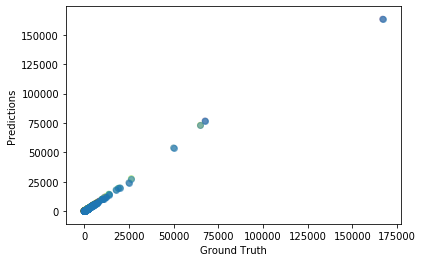

In [102]:
#5. Plotting the Results

N = 250
colors = np.random.rand(N)
plt.scatter(y_test, predictions, c= colors, alpha = 0.5)

#plt.scatter(y_test, predictions, color=['blue','green'], alpha = 0.5) # Note: doesn't work

plt.scatter(y_test, predictions, alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();
